In [3]:
# Multiple Linear Regression Machine Learning In Python

# Demostration of MLR, cross-validation, evaluating cross-validation.

# y = a1x1 + a2x2 + a3x3 + ... + anxn + b
# y = target
# x = single feature
# a,b = parameters/coefficients of the model - slope,intercept

# How do we choose a and b?
# - Define an error function for any given line
# - Choose the line that minimizes the error function
# Error function = lost function = cost function
# Regression minimizes a loss function to choose a coefficient 'a', for each feature and the intercept 'b'. If we allow these coefficients to become too large = overfitting.


# __________Terms__________
# Residual:                     is the difference between the expected results from a model and the true values from data.
# Variance:                     is the variability in the expected results (predictions) of a given data point between different runs of the model.
# R-squared:                    is the absolute amount of variation as a proportion of total variation. quantifies the amount of variance in the target variable that is explained by the features. Ranges from 0 to 1, 0=low, 1=high
# Mean Squared Error (MSE):     measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero. As model error increases, its value increases.
# Root Mean Squared Error(RMSE):Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.
# RSS:                          residual sum of squares, The residual sum of squares (RSS) is the absolute amount of explained variation.
# Ordinary Least Squares(OLS):  Goal is to Minimize RSS. A Common technique for estimating coefficients of linear regression equations which describe the relationship
#                               between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).
#                               OLS estimators minimize the sum of the squared errors (a difference between observed values and predicted values).
# - Advantages of OLS:          OLS is the most efficient linear regression estimator when the assumptions hold true. 
#                               Another benefit of satisfying these assumptions is that as the sample size increases to infinity, the coefficient estimates converge on the actual population parameters.
# - Disadvantages of OLS:       As with OLS, a large data set is necessary in order to obtain reliable results. 
#                               The regression results are sensitive to functional form if the error term is not adequately interpreted, which can lead to widely varying conclusions depending on how the regression is initially set up.
# Cross Fold Validation:        Folds the training data over in nth folds. In 5-fold the data would be spliced in 5ths, then 4 would be used to compare on the 5th, iterates 5 times to use each block/fold as a validation. More folds = higher computational expense.
#                               Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.
#                               By using cross-validation, we can see how performance varies depending on how the data is split.
# Hyperparameter:               Variable used to to optimize model parameters.
# Regularization:               Penalizes large coefficients.
# - Ridge Regression:           Ridge penalizes large positive or negative coefficients. contains the hyperprameter Alpha which is simular to Kappa in KNN. Alpha controls model complexity.
#                               When Alpha = 0 we are preforming OLS (Can lead to overfitting). A very high Alpha can lead extreme penalization of coefficients ie. underfitting.
# - Lasso Regression:           Can be used to select feature importance, as it actually shrinks the coefficients of least importance to 0. The features not reduced will be selected by Lasso.


# pip3 install pandas
# pip3 install scikit-learn
# pip3 install matplotlib
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Importing the 'advertising_and_sales_clean.csv' dataset as a pandas dataframe
sales_df = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/advertising_and_sales_clean.csv')

# Removing column "influencer"
sales_df = sales_df.drop("influencer", axis=1)

# Create X and y arrays, X represents the features, y represents the target.
X = sales_df.drop('sales', axis=1).values
y = sales_df['sales'].values

# Creating splits on df
# test_size parameter states we are reserving 70% for training and 30% for testing.
# random_state parameter sets a seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Ridge Regression


# Creating Alphas
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

# Creating empty list so that we can compare the alphas and determine which one we should use.
ridge_scores = []
for alpha in alphas:
  
  # Instantiate a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared and append it to our list
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)

# Display our R2 scores for each Alpha
print(ridge_scores)

# Terminal output
# [0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]

# The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target.
# Even by heavily penalizing large coefficients, underfitting does not occur.

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


[ 3.56256962 -0.00397035  0.00496385]


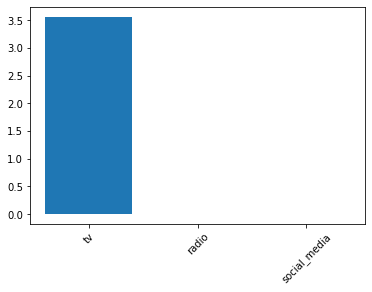

In [8]:
# Lasso Regression for Feature Selection


# Aquire Column names
sales_columns = sales_df.drop("sales", axis=1).columns

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
fit_lasso = lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = fit_lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)

plt.show()

# The figure makes it clear that expenditure on TV 
# advertising is the most important feature in the dataset to predict sales values.